In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv('../mvideo_features.csv')
data = data.drop_duplicates(subset=data.columns.difference(['product_id']), keep='first').reset_index(drop=True)
data.head(3)

,product_id,name,brand,Гарантия,Гарантия предоставляется,Страна,Год релиза,Серия,Состояние,Внешний вид,...,Разрешение дополнительного экрана по вертикали (Пикс),Разрешение дополнительного экрана по горизонтали (Пикс),Складной смартфон,Встроенный искусственный интеллект,Проводная гарнитура,Micro-SIM,Гарантия на аксессуары (мес.),Гарантия на АКБ (мес.),Дополнительная комплектация,Сканер радужной оболочки глаза
0,30063534,Смартфон Apple iPhone 13 128GB nanoSim/eSim Mi...,Apple,1 год,продавцом,Китай,2021.0,iPhone 13,новый,новый,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,400410049,Смартфон HONOR X9c 12/256GB Titanium Black,HONOR,2 года,производителем,Китай,2025.0,X9c,новый,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,400307033,Смартфон HUAWEI Pura 70 Pro 12/512GB White,HUAWEI,1 год,производителем,Китай,2024.0,Pura 70 Pro,новый,новый,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
desc = data[['salePrice', 'basePrice']].describe().T
desc['nan_count'] = data[['salePrice', 'basePrice']].isna().sum()
desc = desc[['count', 'nan_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print(desc)

           count  nan_count          mean           std     min      25%  \
salePrice  929.0          0  62275.987083  51447.065499  5499.0  21999.0   
basePrice  929.0          0  74931.993541  58469.397968  6499.0  27999.0   

               50%       75%       max  
salePrice  44999.0   89990.0  299999.0  
basePrice  54999.0  109999.0  339999.0  


In [19]:
# Описательные статистики только для salePrice
data["ln_price"] = np.log(data['salePrice'])
desc_sale = data['ln_price'].describe().to_frame().T
desc_sale['nan_count'] = data['ln_price'].isna().sum()
desc_sale = desc_sale[['count', 'nan_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

print(desc_sale)


          count  nan_count      mean       std       min       25%        50%  \
ln_price  929.0          0  10.69054  0.871821  8.612322  9.998752  10.714396   

                75%        max  
ln_price  11.407454  12.611534  


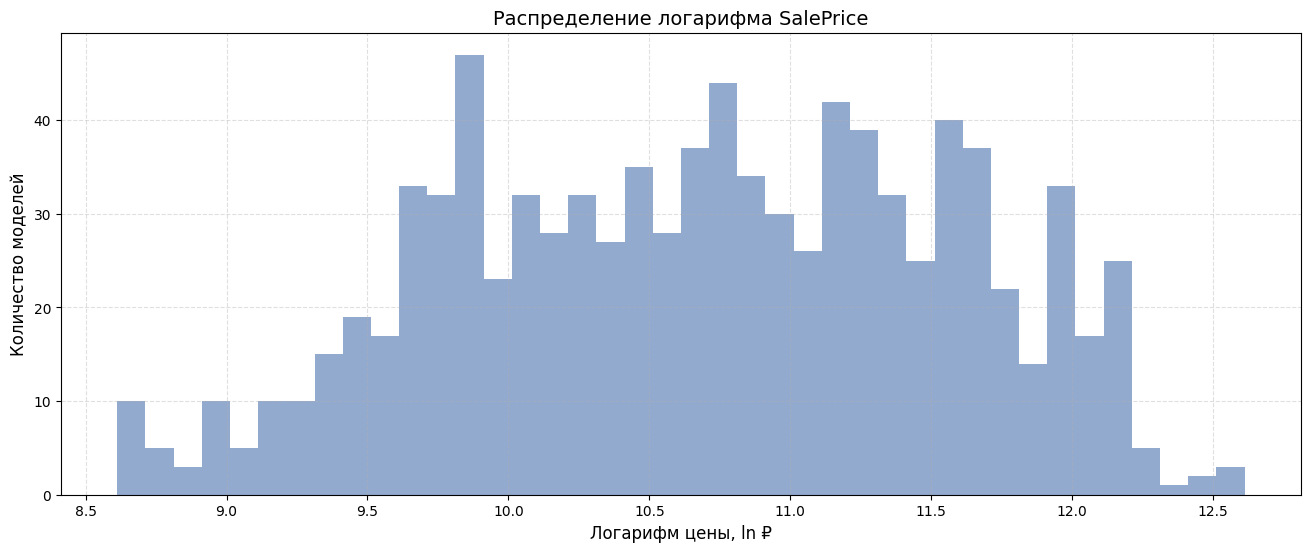

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig2, ax = plt.subplots(figsize=(16, 6))

# Цветовая палитра
colors = ['#4C72B0']

# Гистограммы слева
data['ln_price'].plot.hist(alpha=0.6, bins=40, ax=ax, color=colors)
ax.set_title('Распределение логарифма SalePrice', fontsize=14)
ax.set_xlabel('Логарифм цены, ln ₽', fontsize=12)
ax.set_ylabel('Количество моделей', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.4)


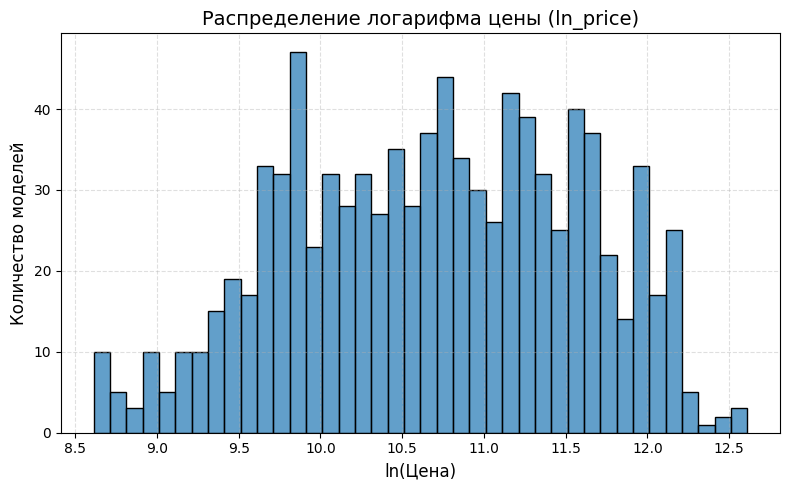

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Цвет

# Гистограмма логарифма цены
plt.figure(figsize=(8, 5))
sns.histplot(data['ln_price'], bins=40, alpha=0.7)

plt.title('Распределение логарифма цены (ln_price)', fontsize=14)
plt.xlabel('ln(Цена)', fontsize=12)
plt.ylabel('Количество моделей', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


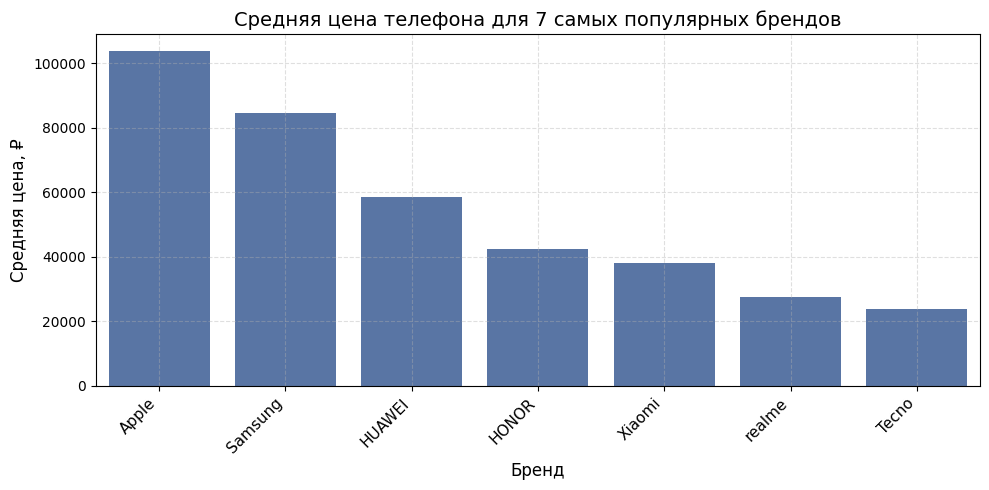

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Определим 7 самых популярных брендов по количеству моделей
top_brands = data['brand'].value_counts().head(7).index

# Посчитаем среднюю цену для этих брендов
mean_prices = data[data['brand'].isin(top_brands)].groupby('brand')[['salePrice', 'basePrice']].mean().sort_values('salePrice', ascending=False)

# Построим barplot
fig, ax = plt.subplots(figsize=(10, 5))

# Цветовая палитра
colors = ['#4C72B0']

# Барплот для salePrice
sns.barplot(data=mean_prices.reset_index(), x='brand', y='salePrice', color=colors[0], ax=ax)
ax.set_ylabel('Средняя цена, ₽', fontsize=12)
ax.set_xlabel('Бренд', fontsize=12)
ax.set_title('Средняя цена телефона для 7 самых популярных брендов', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


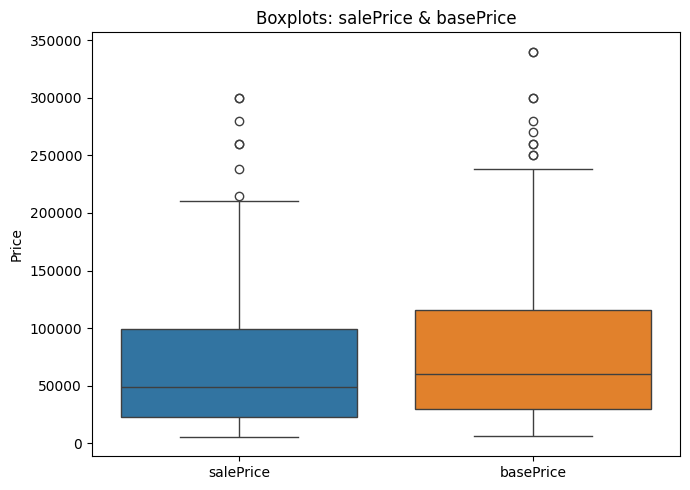

In [8]:
# Табличка с описательными статистиками и количеством NaN
desc = data[['salePrice', 'basePrice']].describe().T
desc['nan_count'] = data[['salePrice', 'basePrice']].isna().sum()
desc = desc[['count', 'nan_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Сохраняем таблицу как картинку
fig_table, ax_table = plt.subplots(figsize=(6, 2.5))
ax_table.axis('off')
table_img = ax_table.table(
    cellText=desc.round(2).values,
    rowLabels=desc.index,
    colLabels=desc.columns,
    cellLoc='center',
    loc='center'
)
table_img.auto_set_font_size(False)
table_img.set_fontsize(10)
table_img.scale(1.2, 1.2)
plt.tight_layout()
plt.savefig('desc_stats.png', bbox_inches='tight', dpi=200)
plt.close(fig_table)

# Боксплоты распределений
plt.figure(figsize=(7, 5))
sns.boxplot(data=data[['salePrice', 'basePrice']])
plt.title('Boxplots: salePrice & basePrice')
plt.ylabel('Price')
plt.xlabel('')
plt.tight_layout()
plt.show()

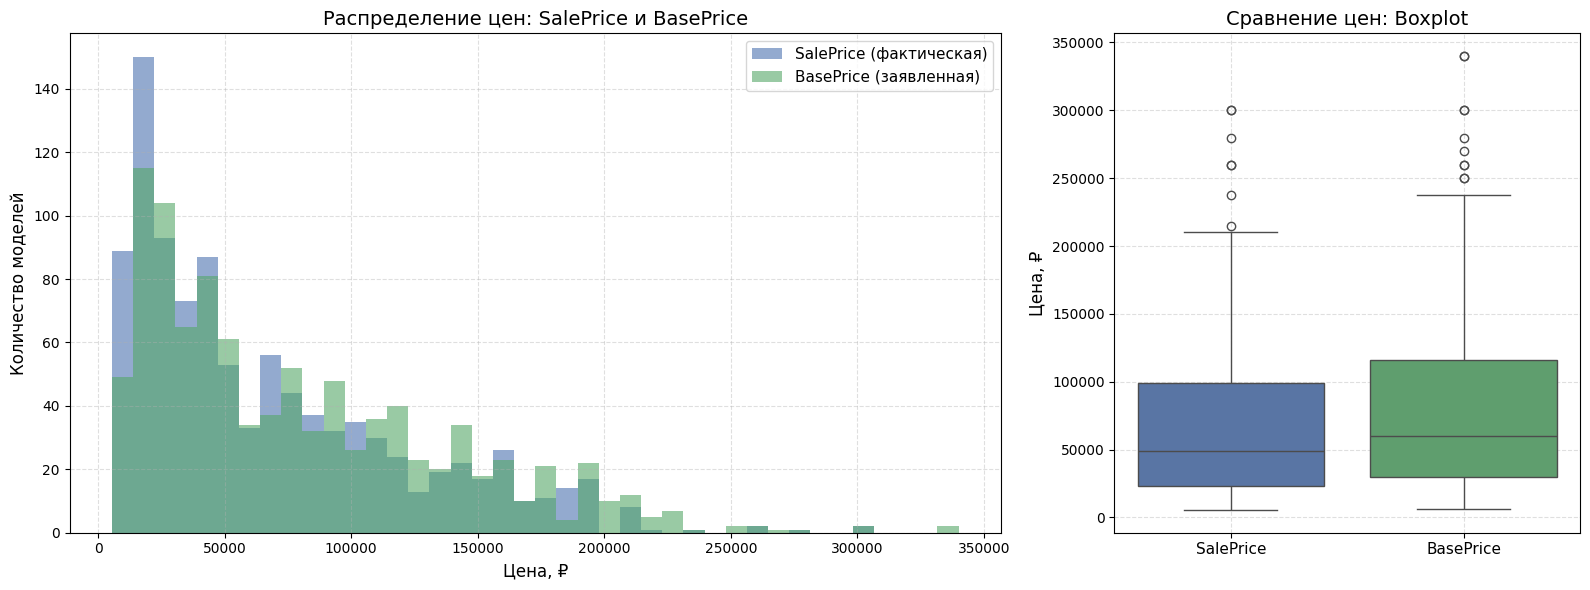

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig2, ax2 = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})

# Цветовая палитра
colors = ['#4C72B0', '#55A868']

# Гистограммы слева
data[['salePrice', 'basePrice']].plot.hist(alpha=0.6, bins=40, ax=ax2[0], color=colors)
ax2[0].set_title('Распределение цен: SalePrice и BasePrice', fontsize=14)
ax2[0].set_xlabel('Цена, ₽', fontsize=12)
ax2[0].set_ylabel('Количество моделей', fontsize=12)
ax2[0].legend(['SalePrice (фактическая)', 'BasePrice (заявленная)'], fontsize=11)
ax2[0].grid(True, linestyle='--', alpha=0.4)

# Боксплоты справа
sns.boxplot(data=data[['salePrice', 'basePrice']], palette=colors, ax=ax2[1])
ax2[1].set_title('Сравнение цен: Boxplot', fontsize=14)
ax2[1].set_ylabel('Цена, ₽', fontsize=12)
ax2[1].set_xticklabels(['SalePrice', 'BasePrice'], fontsize=11)
ax2[1].grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


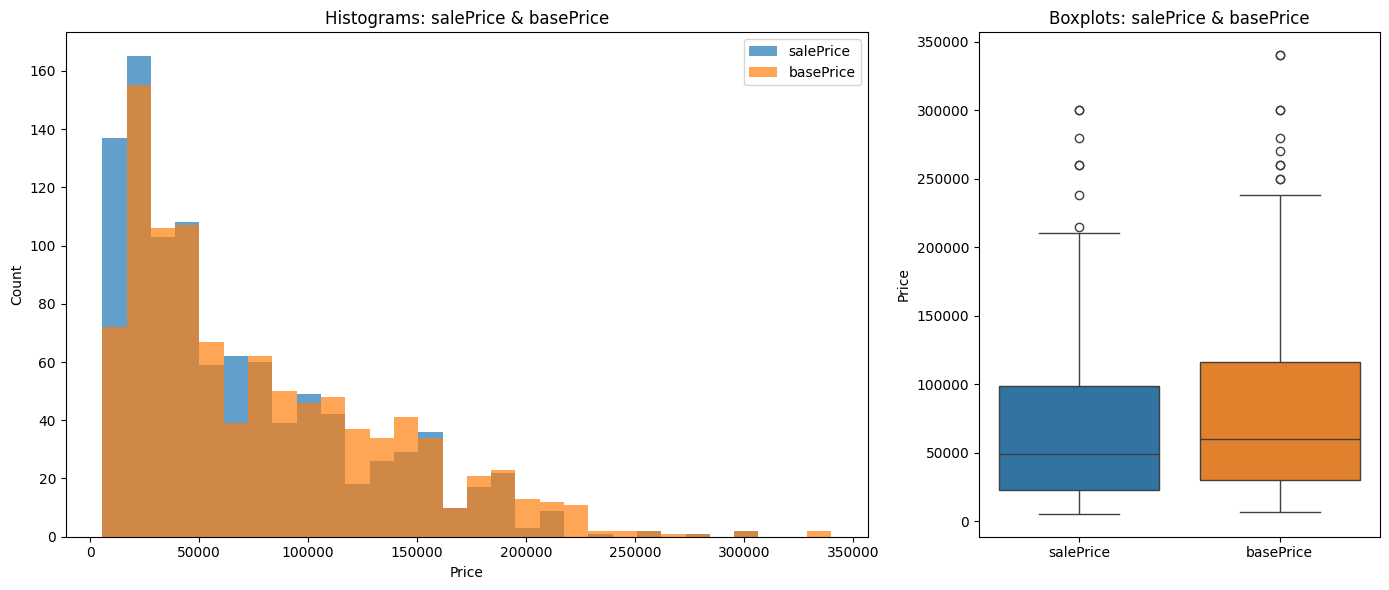

In [6]:
fig2, ax2 = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})

# Гистограммы слева
data[['salePrice', 'basePrice']].plot.hist(alpha=0.7, bins=30, ax=ax2[0])
ax2[0].set_title('Histograms: salePrice & basePrice')
ax2[0].set_xlabel('Price')
ax2[0].set_ylabel('Count')
ax2[0].legend(['salePrice', 'basePrice'])

# Боксплоты справа
sns.boxplot(data=data[['salePrice', 'basePrice']], ax=ax2[1])
ax2[1].set_title('Boxplots: salePrice & basePrice')
ax2[1].set_ylabel('Price')
ax2[1].set_xlabel('')

plt.tight_layout()
plt.show()

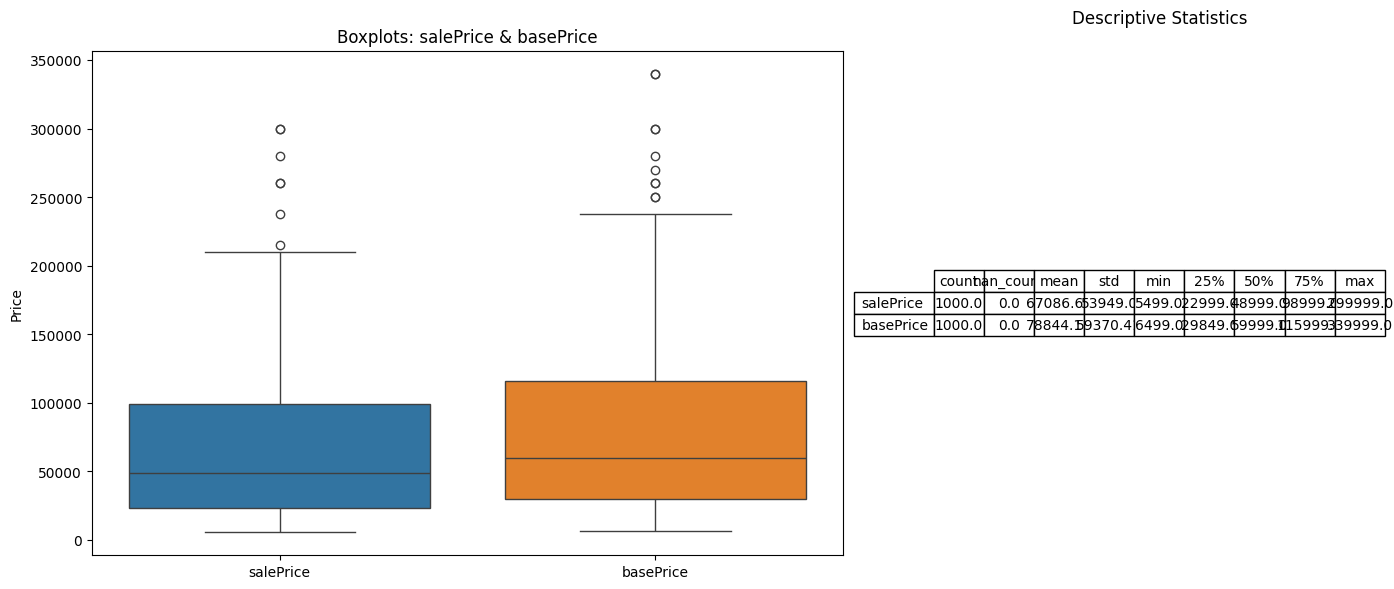

In [4]:
# Описательные статистики для salePrice и basePrice
desc = data[['salePrice', 'basePrice']].describe().T
desc['nan_count'] = data[['salePrice', 'basePrice']].isna().sum()
desc = desc[['count', 'nan_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Визуализация: слева боксплоты, справа таблица
fig, ax = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})

# Боксплоты
sns.boxplot(data=data[['salePrice', 'basePrice']], ax=ax[0])
ax[0].set_title('Boxplots: salePrice & basePrice')
ax[0].set_ylabel('Price')
ax[0].set_xlabel('')

# Таблица с описательными статистиками
ax[1].axis('off')
table = ax[1].table(cellText=desc.round(2).values,
                    rowLabels=desc.index,
                    colLabels=desc.columns,
                    cellLoc='center',
                    loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
ax[1].set_title('Descriptive Statistics', pad=20)

plt.tight_layout()
plt.show()